In [1]:
from fontTools.ttLib import TTFont
font = TTFont("cambria.ttc", fontNumber=0)
print('glyphID is: ' + str(font.getGlyphID("a")))

glyphID is: 131


In [2]:
print(ord('a'))

97


In [3]:
glyph = font.getGlyphSet()['a']
print('width of glyph is ' + str(glyph.width))

width of glyph is 1000


In [4]:
units_per_em = font['head'].unitsPerEm
print('units per em is: ' + str(units_per_em))

units per em is: 2048


In [5]:
len(font.getGlyphNames())

7614

In [6]:
font.getGlyphNames()[:10]

['.notdef',
 'A',
 'AE',
 'AEacute',
 'Aacute',
 'Abreve',
 'Acircumflex',
 'Adieresis',
 'Agrave',
 'Alpha']

In [7]:
font.getBestCmap()

{0: 'uni0000',
 13: 'uni000D',
 32: 'space',
 33: 'exclam',
 34: 'quotedbl',
 35: 'numbersign',
 36: 'dollar',
 37: 'percent',
 38: 'ampersand',
 39: 'quotesingle',
 40: 'parenleft',
 41: 'parenright',
 42: 'asterisk',
 43: 'plus',
 44: 'comma',
 45: 'hyphen',
 46: 'period',
 47: 'slash',
 48: 'zero',
 49: 'one',
 50: 'two',
 51: 'three',
 52: 'four',
 53: 'five',
 54: 'six',
 55: 'seven',
 56: 'eight',
 57: 'nine',
 58: 'colon',
 59: 'semicolon',
 60: 'less',
 61: 'equal',
 62: 'greater',
 63: 'question',
 64: 'at',
 65: 'A',
 66: 'B',
 67: 'C',
 68: 'D',
 69: 'E',
 70: 'F',
 71: 'G',
 72: 'H',
 73: 'I',
 74: 'J',
 75: 'K',
 76: 'L',
 77: 'M',
 78: 'N',
 79: 'O',
 80: 'P',
 81: 'Q',
 82: 'R',
 83: 'S',
 84: 'T',
 85: 'U',
 86: 'V',
 87: 'W',
 88: 'X',
 89: 'Y',
 90: 'Z',
 91: 'bracketleft',
 92: 'backslash',
 93: 'bracketright',
 94: 'asciicircum',
 95: 'underscore',
 96: 'grave',
 97: 'a',
 98: 'b',
 99: 'c',
 100: 'd',
 101: 'e',
 102: 'f',
 103: 'g',
 104: 'h',
 105: 'i',
 106: 'j'

In [8]:
font.getBestCmap()[ord('ã')]

'atilde'

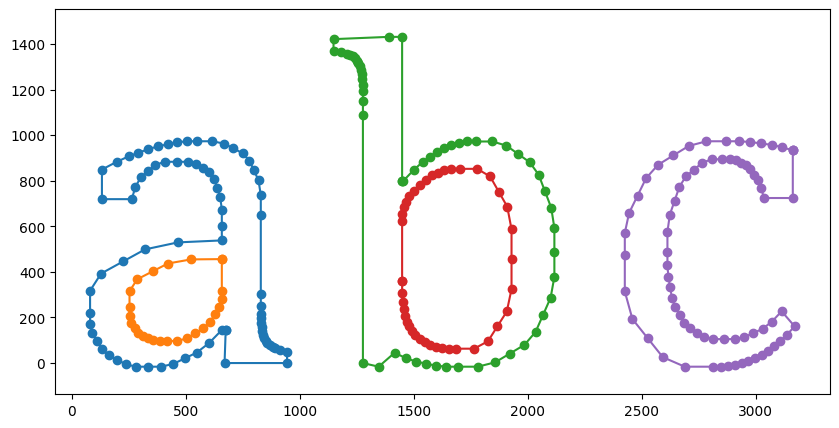

In [14]:
import matplotlib.pyplot as plt
from fontTools.pens.basePen import BasePen

class MatplotlibPen(BasePen):
    def __init__(self, glyphSet):
        super().__init__(glyphSet)
        self.paths = []

    def _moveTo(self, p0):
        self.paths.append([p0])

    def _lineTo(self, p1):
        self.paths[-1].append(p1)

    def _curveToOne(self, p1, p2, p3):
        self.paths[-1].extend([p1, p2, p3])

    def _closePath(self):
        self.paths[-1].append(self.paths[-1][0])

text = "abc"  # String of characters to plot
x_offset = 0  # Initial x-offset for positioning characters
spacing = 100  # Spacing between characters

plt.figure(figsize=(10, 5))

for char in text:
    glyph = font.getGlyphSet()[char]
    pen = MatplotlibPen(font.getGlyphSet())
    glyph.draw(pen)
    
    # Plot the glyph with the current x_offset
    for path in pen.paths:
        x, y = zip(*path)
        x = [point_x + x_offset for point_x in x]  # Apply x_offset to x-coordinates
        plt.plot(x, y, marker='o')
    
    # Update x_offset for the next character
    x_offset += glyph.width + spacing

plt.axis('equal')
plt.show()
